In [2]:
### ----- Imports ----- ###

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os.path
import os
import shutil
import glob
import h5py
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
import seaborn as sns
import pandas as pd

dataset = 'v1b'

2023-05-08 14:51:09.178287: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-08 14:51:09.178308: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
### ----- Load the historic testing dataset ----- ###

historic_path = '/hdd/mlaapde/decimated/'

historic_test_waves = np.load(historic_path + 'historic_test_waves.npy')
historic_test_mags = np.load(historic_path + 'historic_test_mags.npy')
historic_test_eventids = np.load(historic_path + 'historic_test_eventids.npy')

print(historic_test_waves.shape)
print(historic_test_mags.shape)
print(historic_test_eventids.shape)
n_channels_hist = 3

bad_hist_indices = np.loadtxt('/home/sdybing/mlaapde/codes/bad_historic_waves.txt').astype(int)

historic_test_waves_nonan = np.delete(historic_test_waves, bad_hist_indices, axis = 0)
historic_test_mags_nonan = np.delete(historic_test_mags, bad_hist_indices, axis = 0)
historic_test_eventids_nonan = np.delete(historic_test_eventids, bad_hist_indices, axis = 0)

print(historic_test_waves.shape)
print(historic_test_waves_nonan.shape)
print(historic_test_mags.shape)
print(historic_test_mags_nonan.shape)
print(historic_test_eventids.shape)
print(historic_test_eventids_nonan.shape)

n_historic_test_samp = len(historic_test_waves_nonan)

historic_test_mags_nonan = np.round_(historic_test_mags_nonan, decimals = 1)

(13449, 2400, 3)
(13449,)
(13449,)
(13449, 2400, 3)
(13151, 2400, 3)
(13449,)
(13151,)
(13449,)
(13151,)


In [4]:
# For 114 seconds

all_test_preds = np.load('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/mag_preds/114s_window_magpreds.npy')

historic_test_preds = all_test_preds[-13151:]

In [5]:
all_test_preds

array([[2.8888526],
       [2.7431145],
       [2.5762062],
       ...,
       [4.649278 ],
       [5.709472 ],
       [5.9146514]], dtype=float32)

In [14]:
historic_test_preds.shape

(13151, 1)

In [161]:
events = historic_test_eventids_nonan

tsuQ_1 = 'usp000hnj4' # Mentawai 7.8
tsuQ_2 = 'usp000ensm' # Pangandaran 7.7
deep_1 = 'usb000h4jh' # 598 km 8.3
deep_2 = 'usp000hgmq' # 641 km 7.5
deep_3 = 'usp000hgmh' # 578 km 7.6
#deep_4 = 'usp000ba6m' # 675 km 7.7
#deep_4 = 'usp000gbc0' # 633 km 7.7
complex_1 = 'official20120411083836720_20' # Wharton basin 8.6
complex_2 = # Kaikoura

# i = np.where((events == tsuQ_1) | (events == tsuQ_2))[0]
# j = np.where((events != tsuQ_1) | (events != tsuQ_2))[0]
# #print(i)

# sel_mags = historic_test_mags_nonan[i]
# sel_preds = historic_test_preds[i]
# #print(sel_mags)
# #print(sel_preds)

# nonsel_mags = historic_test_mags_nonan[j]
# nonsel_preds = historic_test_preds[j]

In [17]:
# plt.scatter(sel_mags, sel_preds, color = 'C0', alpha = 0.5)
# plt.scatter(nonsel_mags, nonsel_preds, color = 'C1', alpha = 0.01);

In [18]:
# sel_preds_reshape = np.reshape(sel_preds, (len(sel_preds),))
# nonsel_preds_reshape = np.reshape(nonsel_preds, (len(nonsel_preds),))

# historic_test_preds_reshape = np.reshape(historic_test_preds, (len(historic_test_preds),)) # All events

In [19]:
# nonment_error = np.subtract(nonment_preds_reshape, nonment_mags)
# plt.scatter(nonment_mags, nonment_error)

In [162]:
eq_category = []

for idx in range(len(events)):
    
    if events[idx] == tsuQ_1 or events[idx] == tsuQ_2 or events[idx] == deep_1 or events[idx] == deep_2 or events[idx] == deep_3 or events[idx] == complex_1:
        #eq_category.append('Mentawai')
        eq_category.append('Edge cases')
    
    else:
        eq_category.append('Typical eqs')

eq_category = np.array(eq_category)

In [146]:
d = {'events': events, 'Catalog magnitude': historic_test_mags_nonan, 'Predicted magnitude': historic_test_preds_reshape, 'Eq. type': eq_category}
data = pd.DataFrame(data = d)


In [130]:
usgs_catalog = np.genfromtxt('/home/sdybing/mlaapde/2000-2013_catalog.csv', delimiter = ',', dtype = 'str', skip_header = 1) # M7.5+ 01/01/2000 - 07/31/2013



In [147]:
usgs_catalog[:,4].astype(float)

array([7.6 , 7.6 , 7.9 , 7.9 , 8.  , 7.8 , 7.8 , 7.5 , 7.7 , 7.7 , 8.4 ,
       7.6 , 7.5 , 7.8 , 7.5 , 7.7 , 7.7 , 7.6 , 7.6 , 7.9 , 7.6 , 7.6 ,
       7.6 , 8.16, 7.8 , 7.5 , 8.1 , 9.1 , 8.6 , 7.8 , 7.6 , 7.5 , 7.6 ,
       7.6 , 7.6 , 8.  , 7.7 , 8.3 , 8.1 , 7.5 , 8.1 , 7.5 , 8.  , 8.4 ,
       7.9 , 7.5 , 7.7 , 7.8 , 7.9 , 7.7 , 7.7 , 7.6 , 7.8 , 7.5 , 8.1 ,
       7.6 , 7.7 , 7.8 , 8.8 , 7.8 , 7.5 , 7.6 , 7.5 , 7.8 , 9.1 , 7.9 ,
       7.7 , 7.6 , 8.6 , 8.2 , 7.7 , 7.6 , 7.6 , 7.8 , 7.5 , 8.  , 7.7 ,
       8.3 ])

In [148]:
catalog_mags = np.around(usgs_catalog[:,4].astype(float), 1)

In [149]:
catalog_mags

array([7.6, 7.6, 7.9, 7.9, 8. , 7.8, 7.8, 7.5, 7.7, 7.7, 8.4, 7.6, 7.5,
       7.8, 7.5, 7.7, 7.7, 7.6, 7.6, 7.9, 7.6, 7.6, 7.6, 8.2, 7.8, 7.5,
       8.1, 9.1, 8.6, 7.8, 7.6, 7.5, 7.6, 7.6, 7.6, 8. , 7.7, 8.3, 8.1,
       7.5, 8.1, 7.5, 8. , 8.4, 7.9, 7.5, 7.7, 7.8, 7.9, 7.7, 7.7, 7.6,
       7.8, 7.5, 8.1, 7.6, 7.7, 7.8, 8.8, 7.8, 7.5, 7.6, 7.5, 7.8, 9.1,
       7.9, 7.7, 7.6, 8.6, 8.2, 7.7, 7.6, 7.6, 7.8, 7.5, 8. , 7.7, 8.3])

In [150]:
count, bins = np.histogram(catalog_mags, bins = 16)

In [151]:
count

array([12, 18, 12, 11,  6,  4,  4,  2,  2,  2,  0,  2,  0,  1,  0,  2])

In [152]:
bins

array([7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1])

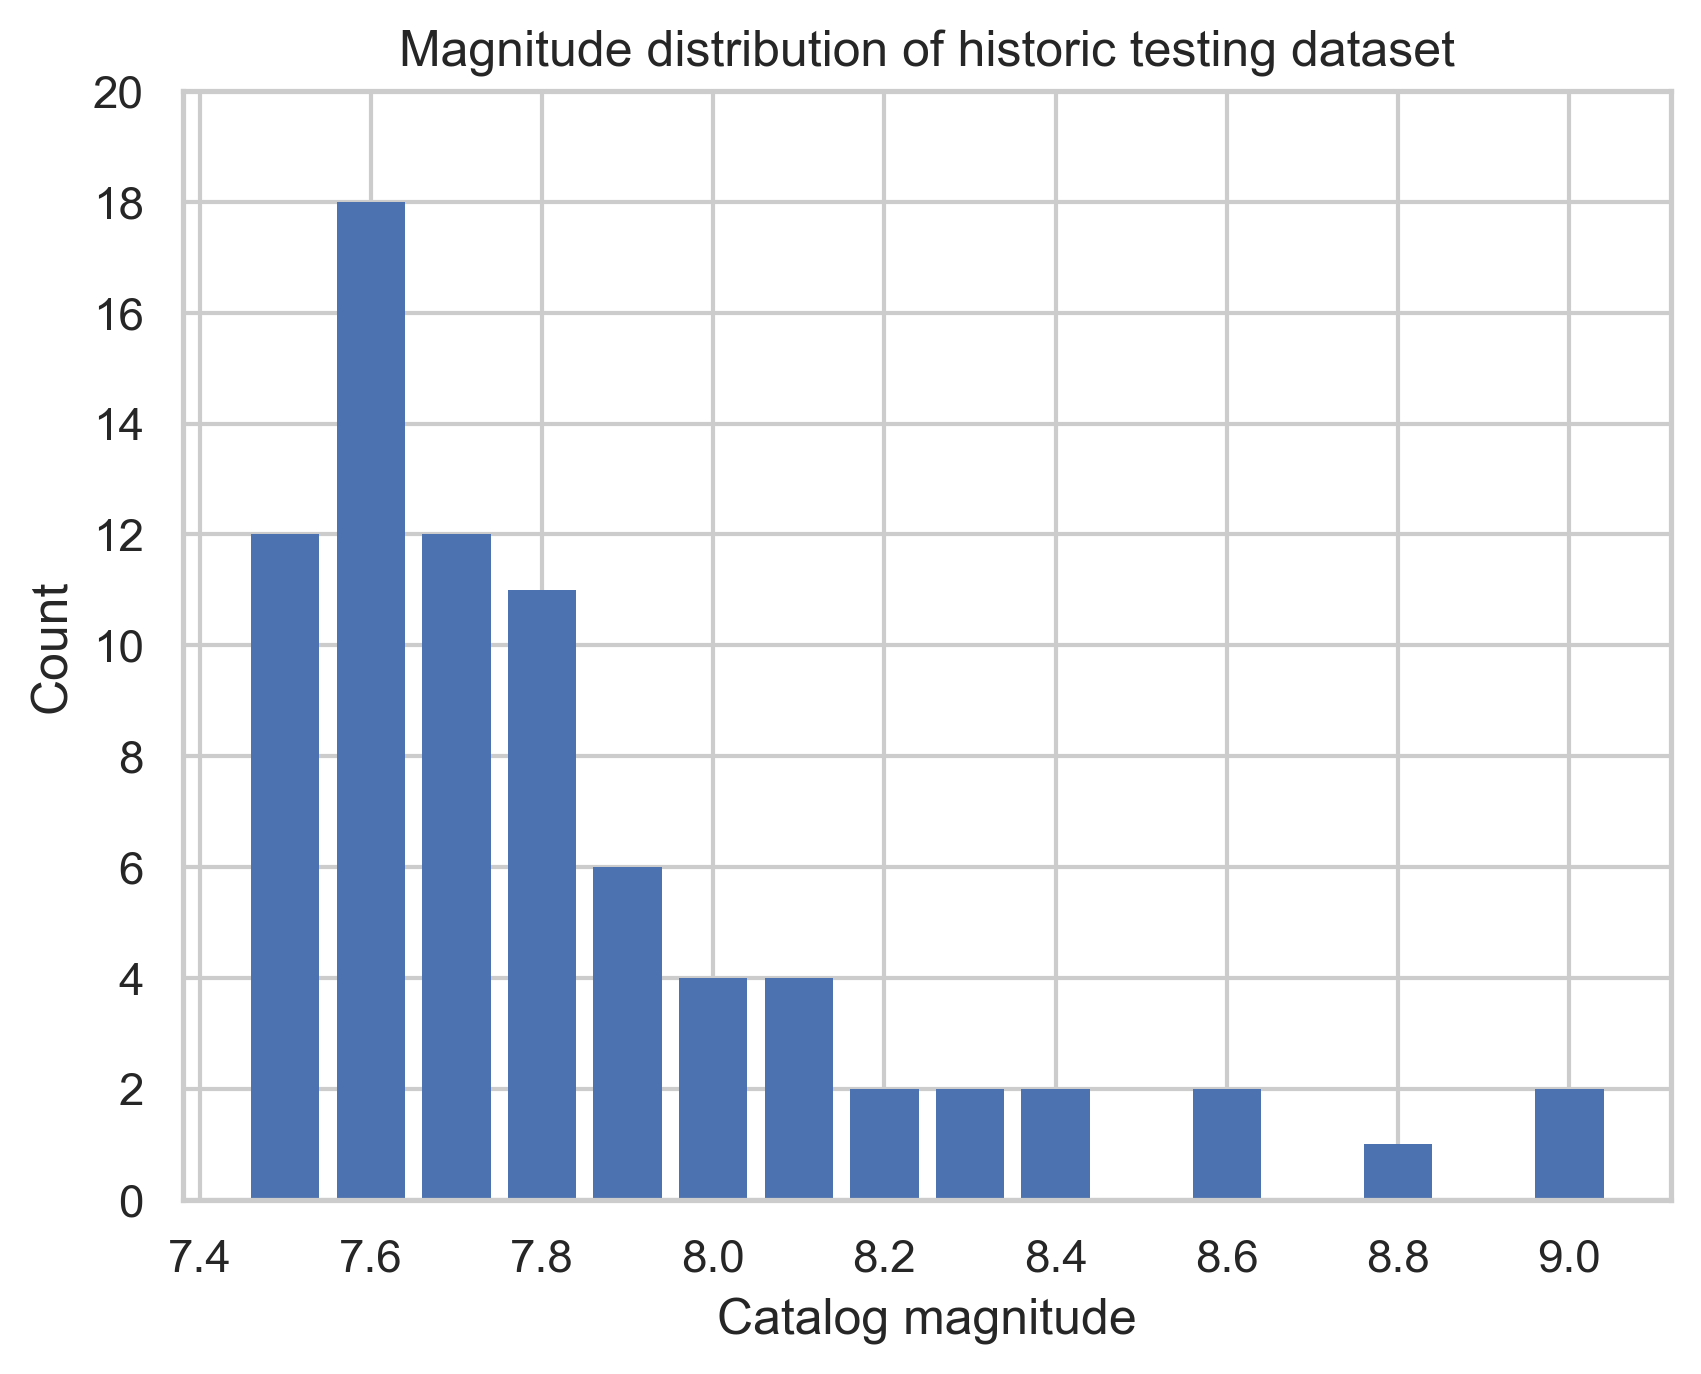

In [174]:
plt.bar(x = bins[:-1], height = count, align = 'center', width = 0.08, edgecolor = 'none')
plt.title('Magnitude distribution of historic testing dataset')
plt.ylim(0,20)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.ylabel('Count')
plt.xlabel('Catalog magnitude')
plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/historicdata_magdistrib_edgecase_testing.png');

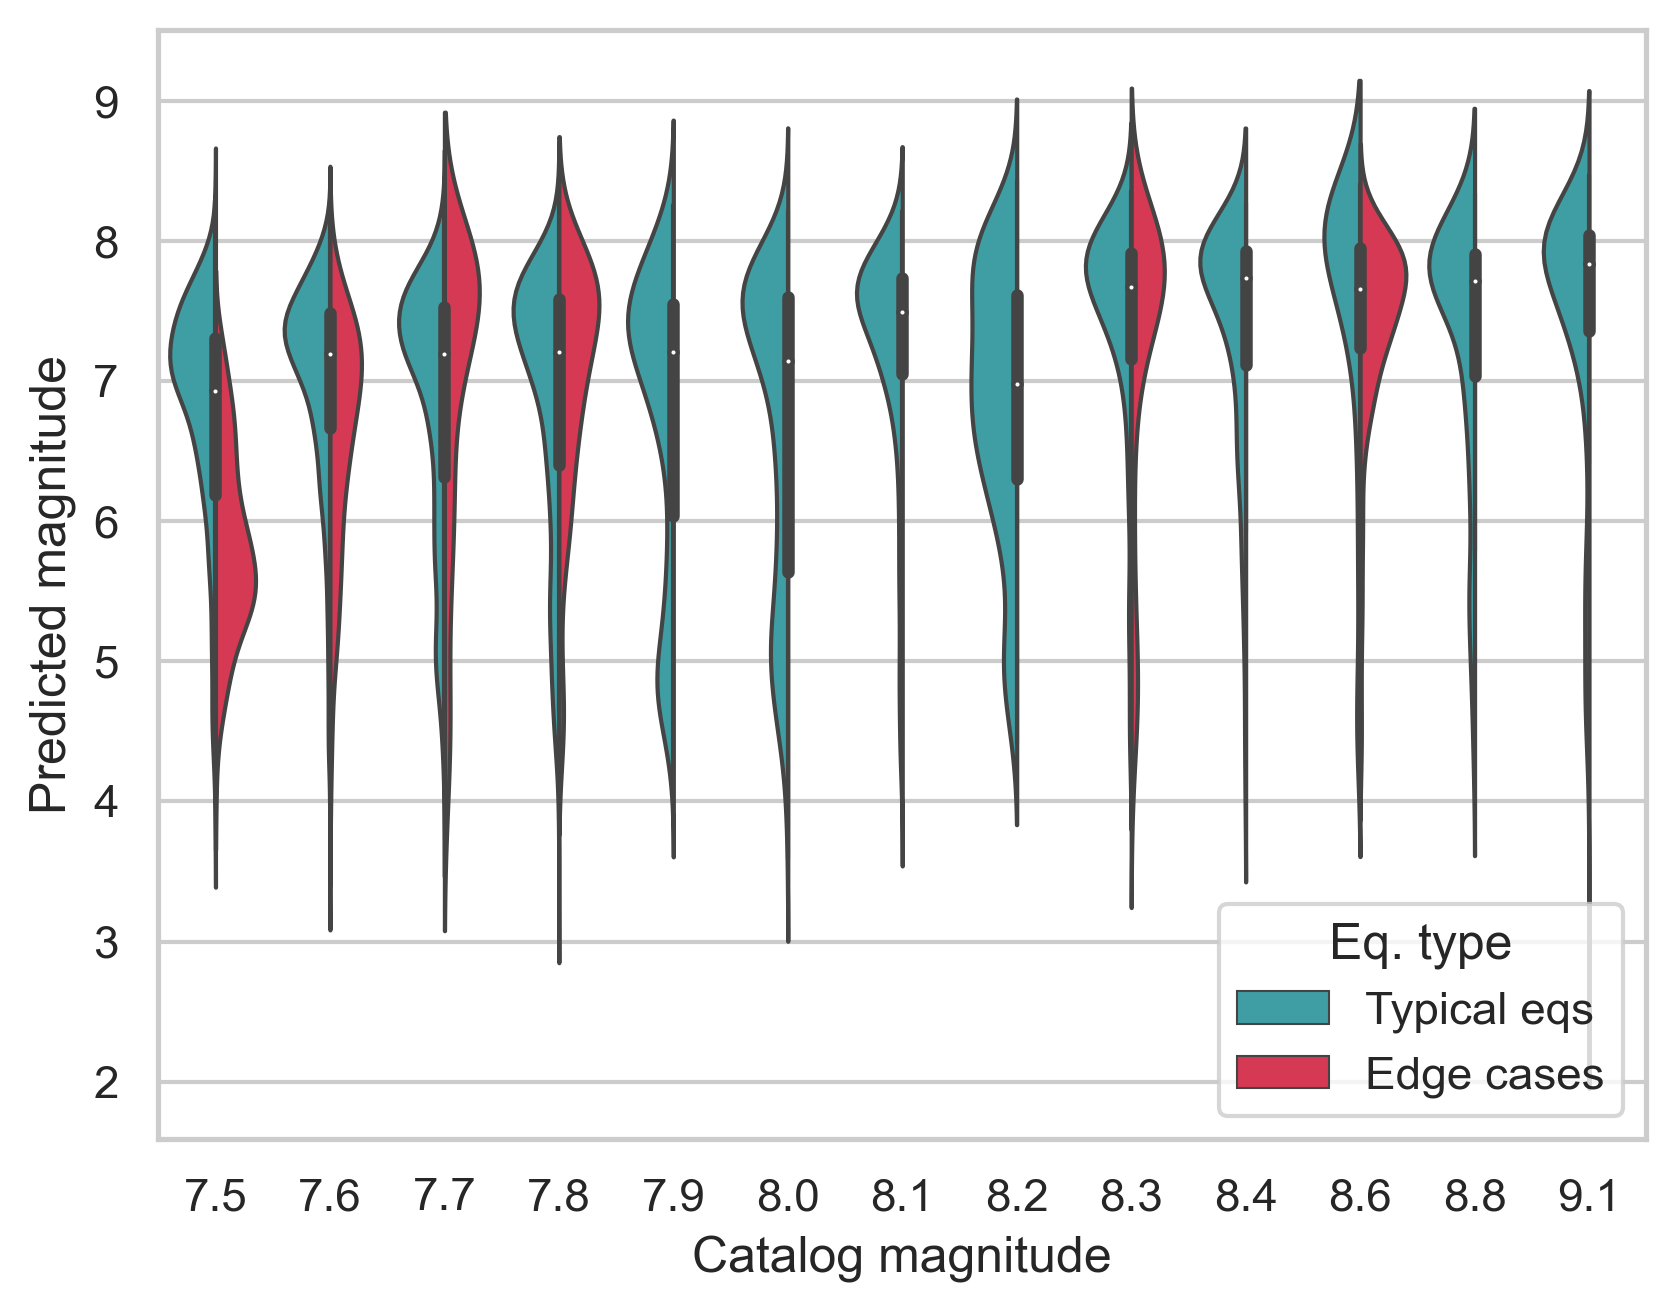

In [172]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style("whitegrid")
ax = sns.violinplot(data=data, x="Catalog magnitude", y="Predicted magnitude", hue="Eq. type", linewidth = 1, palette=['#2DADB4', '#f01f42'], split = True);
# ax2 = ax.twinx()
# ax2.bar(x = bins[:-1], height = count, align = 'edge', width = 0.1, edgecolor = 'none');
sns.move_legend(ax, "lower right")
fig = ax.get_figure()
fig.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/edgecase_testing_violinplot.png');
